In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import xlrd
from matplotlib import rcParams

In [2]:
# Generate data using the formula EI*d^2v1/dx^2 = -P(v0 + v1) + (M1 + M2)/L*x - M1
EI = 2.1e11  # Elastic modulus * moment of inertia (N*m^2)
P = 1000.0   # Axial force (N) 
M1 = 1000.0  # Moment at x=0 (N*m)
M2 = 1000.0  # Moment at x=L (N*m)
L = 1.0      # Beam length (m)
v0 = 0.001   # Initial imperfection (m)

X_star = np.linspace(0, L, 1001).reshape(-1, 1)

# result v1
k = np.sqrt(P / EI)
q = P * L**2 / (np.pi**2 * EI)

# 计算 v1, theta 和 k 的向量化版本
x = X_star[:, 0]  # 提取 x 值
sin_kL = np.sin(k * L)
sin_kx = np.sin(k * x)
sin_pi_x = np.sin(np.pi * x)

v1 = M1 / P * (np.sin(k * (L - x)) / sin_kL - (L - x) / L) - \
        M2 / P * (sin_kx / sin_kL - x / L) + \
        q / (1 - q) * sin_pi_x * v0

theta = M1 / P * (1 / L - np.cos(k * (L - x)) / sin_kL) + \
            M2 / P * (1 / L - k * np.cos(k * x) / sin_kL) + \
            np.pi * q / (L - L * q) * np.cos(np.pi * x / L) * v0

k = -M1 * np.sin(k * (L - x)) / (EI * sin_kL) + \
        M2 * sin_kx / (EI * sin_kL) - \
        q * np.pi**2 * sin_pi_x * v0 / (L**2 * (1 - q))

u_fem = v1  # Displacement
a_fem = theta  # Angle
k_fem = k  # Curvature

N_f = 500
idx = np.random.choice(X_star.shape[0], N_f, replace=False)
X_train = X_star[idx, :]

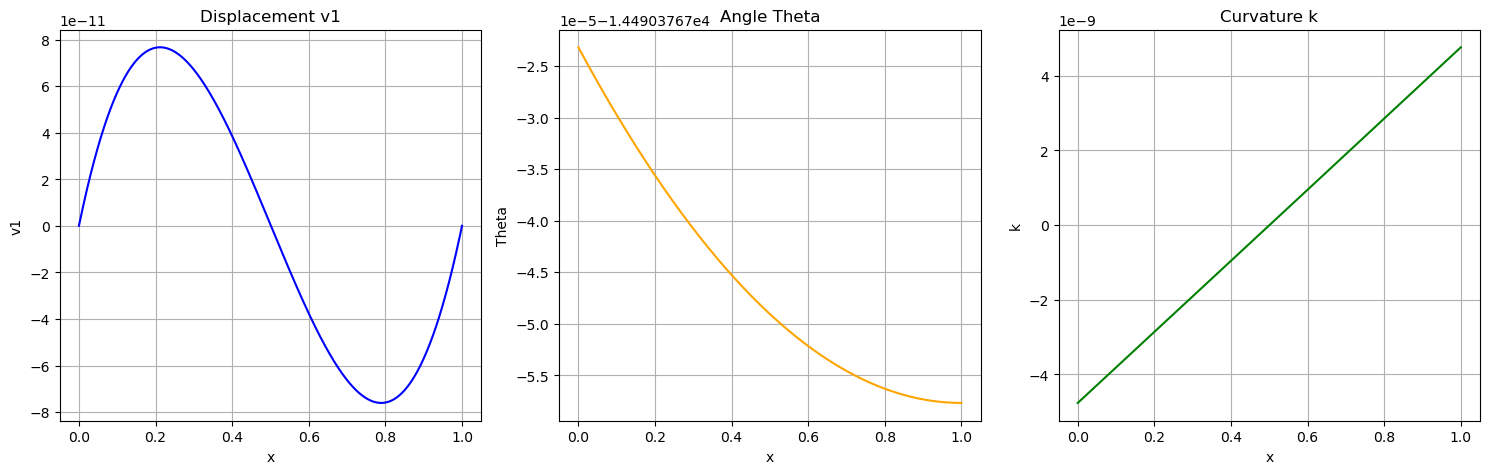

In [3]:

# 绘制 v1, theta 和 k 的数值图像
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
# plt.plot(x, v1, label='v1', color='blue')
plt.plot(x, u_fem, label='v1', color='blue')
plt.title('Displacement v1')
plt.xlabel('x')
plt.ylabel('v1')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(x, theta, label='Theta', color='orange')
plt.title('Angle Theta')
plt.xlabel('x')
plt.ylabel('Theta')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(x, k, label='Curvature k', color='green')
plt.title('Curvature k')
plt.xlabel('x')
plt.ylabel('k')
plt.grid(True)

plt.tight_layout()
plt.savefig('beam1_model1_v1_theta_k_high_res.png', dpi=300, bbox_inches='tight')  # Save the plot
plt.show()


In [4]:
q = np.full_like(X_train, (M1+M2)/(L))
X_uc = np.array([[0.0], [1.0]])
u_c = np.array([[u_fem[0]], [u_fem[-1]]])
X_ac = np.array([[0.0], [1.0]])
a_c = np.array([[a_fem[0]], [a_fem[-1]]])
X_kc = np.array([[0.0], [1.0]])
k_c = np.array([[-k_fem[0]], [-k_fem[-1]]])

In [5]:
print(q)

[[2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 [2000.]
 